# Fraud Detection with Machine Learning 

Fraud is a major issue in banks, life insurance, health insurance, and many other industries. These major frauds are dependent on the person attempting to sell you a bogus product or service. The type of fraud that is on the rise these days is payment fraud. This notebook will walk you through a machine learning solution for fraud detection.

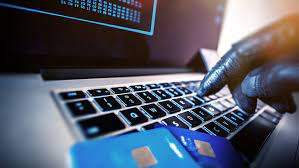

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [12]:
data = pd.read_csv('payment_fraud.csv')
data.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


In [13]:
data.isnull().any()

accountAgeDays          False
numItems                False
localTime               False
paymentMethod           False
paymentMethodAgeDays    False
label                   False
dtype: bool

In [38]:
missing_value_counts = data.isnull().sum()

total_cells = np.product(data.shape)
total_missing = missing_value_counts.sum()

percent_missing = (total_missing/total_cells)*100
percent_missing

0.0

The dataframe has 0% missing values

In [20]:
data.dtypes

accountAgeDays            int64
numItems                  int64
localTime               float64
paymentMethod            object
paymentMethodAgeDays    float64
label                     int64
dtype: object

The data is in a structured format. No missing values.

### Splitting the data into training and testing set

In [30]:
X = data.drop(['label','paymentMethod'], axis=1)
y = data['label']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=17)

As this is a problem of binary classification, I will use a Logistic Regression algorithm, as it is one of the most powerful algorithms for a binary classification model. If you don’t know what Binary Classification means, you can learn it from here. Now let’s simply train the fraud detection model using logistic regression algorithm and have a look at the accuracy score that we will get by using this algorithm:



In [32]:
clf = LogisticRegression().fit(X_train, y_train)

# Make predictions on test set
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))


1.0


Our fraud detection model gave an accuracy of 100 per cent by using the logistic regression algorithm.

### Evaluating the Fraud Detection Model

In [33]:
# Compare test set predictions with ground truth labels
print(confusion_matrix(y_test, y_pred))

[[12753     0]
 [    0   190]]



So out of all the transaction in the dataset,190 transactions are correctly recognized as fraud, and 12753 transactions are recognized as not fraudulent transactions.
